In [7]:
import agate
import warnings
warnings.filterwarnings("ignore")

In [8]:
donations = agate.Table.from_csv('formb1ab.csv')

In [9]:
print(donations)

| column                        | data_type |
| ----------------------------- | --------- |
| Committee Name                | Text      |
| Committee ID                  | Text      |
| Date Received                 | Date      |
| Type of Contributor           | Text      |
| Contributor ID                | Text      |
| Contribution Date             | Date      |
| Cash Contribution             | Number    |
| In-Kind Contribution          | Number    |
| Unpaid Pledges                | Number    |
| Contributor Last Name         | Text      |
| Contributor First Name        | Text      |
| Contributor Middle Initial    | Text      |
| Contributor Organization Name | Text      |
| Contributor Address           | Text      |
| Contributor City              | Text      |
| Contributor State             | Text      |
| Contributor Zipcode           | Text      |



In [19]:
donations_since_2000 = donations.where(lambda row: 2000 <= row['Contribution Date'].year <= 2016)

In [20]:
by_state = donations_since_2000.group_by('Contributor State')

In [21]:
state_totals = by_state.aggregate([
    ('count', agate.Count()),
    ('average cash contribution', agate.Mean('Cash Contribution'))
])

sorted_totals = state_totals.order_by('count', reverse=True)

sorted_totals.print_table(max_rows=25)


| Contributor State |  count | average cash cont... |
| ----------------- | ------ | -------------------- |
| NE                | 88,687 |           1,020.513… |
|                   |  1,924 |           1,241.672… |
| IA                |  1,098 |             798.997… |
| DC                |    910 |           4,381.145… |
| TX                |    906 |           1,170.433… |
| MO                |    686 |           1,243.817… |
| IL                |    610 |           3,000.743… |
| CO                |    552 |           1,386.991… |
| NY                |    542 |           1,322.986… |
| CA                |    419 |           3,065.049… |
| VA                |    389 |           1,677.951… |
| KS                |    362 |           1,194.319… |
| MN                |    316 |           3,253.630… |
| NC                |    314 |             915.335… |
| GA                |    289 |           1,257.903… |
| SD                |    225 |           1,054.566… |
| WI                |    209

In [34]:
def in_state(row):
    if row['Contributor State'] == "NE":
        locale = "In-state"
    else:
        locale = "Out-of-state"
    return locale

contribs_by_locale = donations_since_2000.compute([
    ('locale', agate.Formula(agate.Text(), in_state)),
    ('year', agate.Formula(agate.Number(), lambda row: '%i' % row['Contribution Date'].year))
])

In [35]:
print(contribs_by_locale)

| column                        | data_type |
| ----------------------------- | --------- |
| Committee Name                | Text      |
| Committee ID                  | Text      |
| Date Received                 | Date      |
| Type of Contributor           | Text      |
| Contributor ID                | Text      |
| Contribution Date             | Date      |
| Cash Contribution             | Number    |
| In-Kind Contribution          | Number    |
| Unpaid Pledges                | Number    |
| Contributor Last Name         | Text      |
| Contributor First Name        | Text      |
| Contributor Middle Initial    | Text      |
| Contributor Organization Name | Text      |
| Contributor Address           | Text      |
| Contributor City              | Text      |
| Contributor State             | Text      |
| Contributor Zipcode           | Text      |
| locale                        | Text      |
| year                          | Number    |



In [36]:
contribs_by_locale.print_table(max_rows=5)

| Committee Name       | Committee ID | Date Received | Type of Contributor | Contributor ID | Contribution Date | ... |
| -------------------- | ------------ | ------------- | ------------------- | -------------- | ----------------- | --- |
| CITIZENS FOR NORT... | 99BQC00037   |    2000-03-03 | I                   | 99CON02096     |        2000-02-29 | ... |
| CITIZENS FOR NORT... | 99BQC00037   |    2000-03-03 | I                   | 99CON02093     |        2000-01-21 | ... |
| CITIZENS FOR NORT... | 99BQC00037   |    2000-03-03 | I                   | 99CON01145     |        2000-01-26 | ... |
| CITIZENS FOR NORT... | 99BQC00037   |    2000-03-03 | I                   | 99CON02094     |        2000-02-16 | ... |
| CITIZENS FOR NORT... | 99BQC00037   |    2000-03-03 | I                   | 99CON02095     |        2000-02-16 | ... |
| ...                  | ...          |           ... | ...                 | ...            |               ... | ... |


In [37]:
by_locale_by_year = contribs_by_locale.group_by('locale').group_by('year')

In [38]:
locale_totals = by_locale_by_year.aggregate([
    ('count', agate.Count()),
    ('average cash contribution', agate.Mean('Cash Contribution'))
])

In [55]:
locale_totals.order_by(['locale', 'year']).print_table(max_rows=50)

| locale       |  year |  count | average cash cont... |
| ------------ | ----- | ------ | -------------------- |
| In-state     | 2,000 |  3,330 |             946.076… |
| In-state     | 2,001 |  3,972 |             922.352… |
| In-state     | 2,002 |  4,469 |             867.462… |
| In-state     | 2,003 |  1,956 |             671.867… |
| In-state     | 2,004 |  3,498 |           1,935.598… |
| In-state     | 2,005 |  4,698 |             870.634… |
| In-state     | 2,006 |  8,235 |           1,104.711… |
| In-state     | 2,007 |  3,439 |             734.352… |
| In-state     | 2,008 |  5,313 |             828.067… |
| In-state     | 2,009 |  5,485 |             846.334… |
| In-state     | 2,010 |  6,023 |             828.565… |
| In-state     | 2,011 |  2,367 |             809.634… |
| In-state     | 2,012 |  5,944 |             864.884… |
| In-state     | 2,013 |  6,151 |           1,140.225… |
| In-state     | 2,014 | 12,879 |           1,277.459… |
| In-state     | 2,015 |  4,096

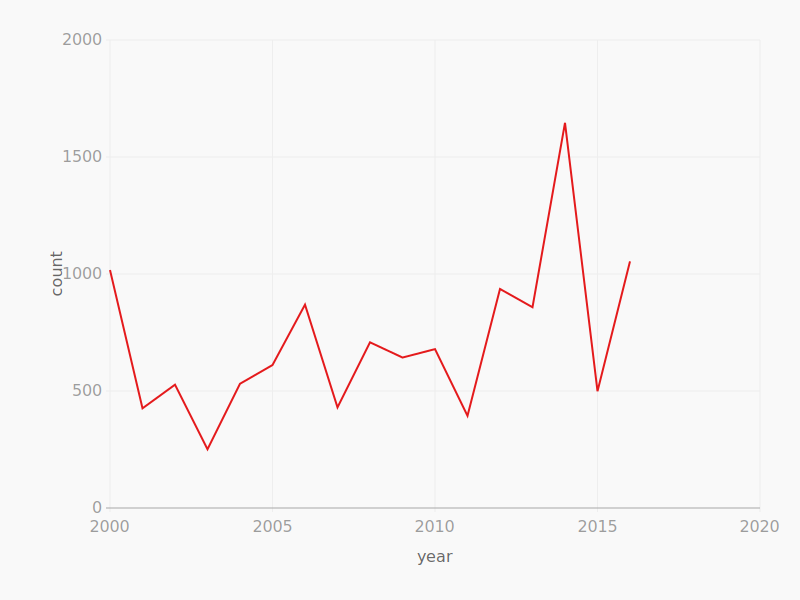

In [49]:
locale_totals.where(lambda row: row['locale'] == "Out-of-state").line_chart('year', 'count')

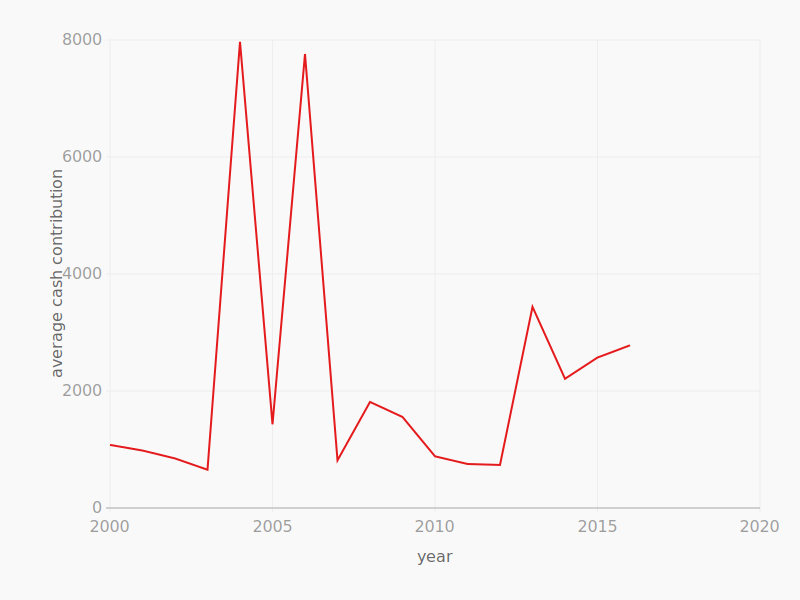

In [56]:
locale_totals.where(lambda row: row['locale'] == "Out-of-state").line_chart('year', 'average cash contribution')